<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto de Parceria** | Aprendizado de Máquina, Regressão: Pesquisa Nacional por Amostra de Domicílios - IBGE

Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Projeto de Parceria**

## 1\. IBGE

Neste projeto, vamos utilizar uma base de dados com informações sobre a renda de uma pessoa, tendo como base os dados do IBGE. A idéia é prever a renda de uma pessoa (**Renda**) baseando em características como sexo, idade, cor/raça e tempo de estudo (variáveis preditivas).

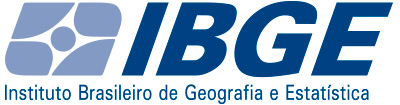

In [1]:
!wget -q "https://raw.githubusercontent.com/Murilo-Valenso/EBAC_Projeto_Parceria/main/dados.csv" -O dados.csv

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte de Dados:**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=downloads

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('dados.csv')

In [4]:
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
datas = data.drop(columns=['UF','Altura'])
datas.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda
0,0,23,8,12,800
1,1,23,2,12,1150
2,1,35,8,15,880
3,0,46,2,6,3500
4,1,47,8,9,150


### **1.1. Analise exploratoria**

Utilizei os gráficos abaixo para entender melhor a relação entre os atributos e a variável resposta da base de dados. Além disso, adicionamos comentários sobre o que foi observado em cada gráfico.

 - Renda do cidadão por COR/RAÇA:

**Código Descrição:**
- 0	Indígena
- 2 	Branca
- 4	Preta
- 6	Amarela
- 8	Parda
- 9	Sem declaração

In [6]:
#gráfico 1
rendas = datas[["Cor", "Renda"]].groupby("Cor").agg("mean").reset_index()
rendas.head()



,Cor,Renda
0,0,1472.887955
1,2,2679.019331
2,4,1442.294840
3,6,4182.920455
4,8,1513.596103


<ipython-input-7-072443311d07>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=datas, x="Cor", y="Renda", ci=None, palette="dark")
<ipython-input-7-072443311d07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=datas, x="Cor", y="Renda", ci=None, palette="dark")


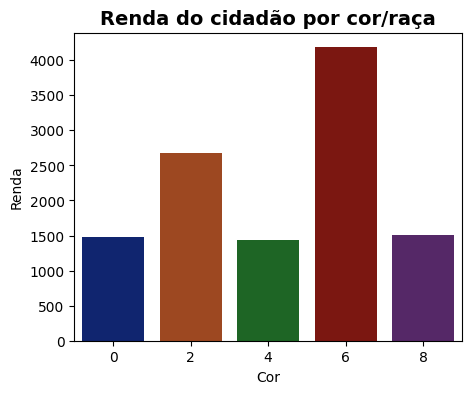

In [7]:
grafico = sns.barplot(data=datas, x="Cor", y="Renda", ci=None, palette="dark")
grafico.set_title("Renda do cidadão por cor/raça", fontsize=14, fontweight="bold");
grafico.set(xlabel="Cor", ylabel="Renda");
grafico.figure.set_size_inches(5,4)

**Comentário:** ?

**.** A desigualdade salarial entre indígenas, negros e brancos chega a mais de 40% de diferença, não é uma novidade em que brancos ganham mais do que negros e minorias.

**.** Contudo, podemos obervar uma tendência em que os asiáticos têm apresentado os melhores salários, onde é claro que anos de estudo e instrução tem peso para uma maior renda.

**.** Vale ressaltar, que a desigualdade de salário está relacionada aos campos de estudo, nos quais os homens asiáticos obtêm mestrado ou doutorado perante as ocupações que eles escolhem na comparação com os homens brancos, por isso, podemos observar que é impressionante que a diferença de renda entre a etnia amarela e branca, chega a ser superior a diferença de renda entre negros e brancos, chegando a mais de 53%.

**.** Certamente, anos de estudo e instrução são a implicação de que a etnia amarela dos asiáticos podem, como resultado desses fatores, conseguir empregos mais bem remunerados e gerar maior renda.

 - Renda do cidadão por SEXO:


**Código Descrição:**
- 0	Masculino
- 1	Feminino

In [8]:
#gráfico 2
rendas2 = datas[["Sexo", "Renda"]].groupby("Sexo").agg("mean").reset_index()
rendas2.head()

,Sexo,Renda
0,0,2192.441596
1,1,1566.847393


<ipython-input-9-b83cd199970b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=datas, x="Sexo", y="Renda", ci=None, palette="dark")
<ipython-input-9-b83cd199970b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=datas, x="Sexo", y="Renda", ci=None, palette="dark")


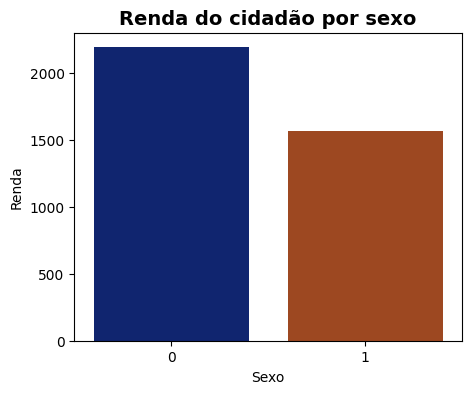

In [9]:
grafico = sns.barplot(data=datas, x="Sexo", y="Renda", ci=None, palette="dark")
grafico.set_title("Renda do cidadão por sexo", fontsize=14, fontweight="bold");
grafico.set(xlabel="Sexo", ylabel="Renda");
grafico.figure.set_size_inches(5,4)

**Comentário:**

**.** O gráfico demonstra que ainda persiste a diferença de renda entre homens e mulheres.

**.** A diferença de remuneração entre homens e mulheres, que vinha em tendência de queda, voltou a subir no país e atingiu 22%, segundo dados do Instituto Brasileiro de Geografia e Estatística (IBGE). Isso significa que ainda uma brasileira recebe, em média, até 78% do que ganha um homem.

**.** Entre as possíveis explicações é o maior crescimento dos setores do agronegócio e indústria, que concentram mais homens, em contrapartida, aos setores das mulheres que apresentaram menor crescimento, resultando em menor empregabilidade e menor renda para as mulheres.

 - Renda do cidadão por IDADE:

<ipython-input-10-cc39e39da894>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=datas, x="Idade", y="Renda", palette="pastel")


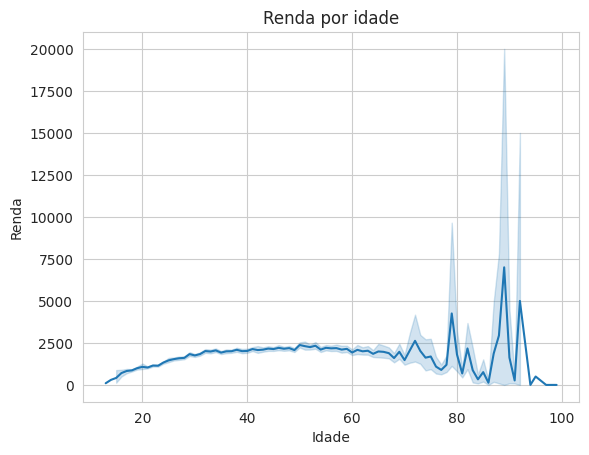

In [10]:
# gráfico 3 de área

rendas3 = data.query("18 <= Idade < 65")

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=datas, x="Idade", y="Renda", palette="pastel")
  grafico.set(title='Renda por idade', xlabel='Idade', ylabel='Renda');


**Comentário:**

**.** Podemos observar que brasileiros têm tendência de renda inferior a R$ 3mil.

**.** Isso porque indicadores de renda, trabalho e educação geram enormes influências sobre as desigualdades sociais e consequentemente menor distribuição de renda.

**.** Ou seja, a má distribuição de recursos, a lógica de acumulação do mercado capitalista (consumo, mais-valia), a falta de investimento nas áreas sociais, culturais, saúde e educação são fatores responsáveis pela menor renda do brasileiro.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilizei os passos a seguir  para trata-los.

In [11]:
datas.isnull().sum()

Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
dtype: int64

In [12]:
data_clean_df = datas.dropna(subset=['Sexo','Cor'])
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda
0,0,23,8,12,800
1,1,23,2,12,1150
2,1,35,8,15,880
3,0,46,2,6,3500
4,1,47,8,9,150


In [13]:
print(data_clean_df.isna().sum())

Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
dtype: int64


### **2.2. Variáveis numéricas**

Identifiquei as variáveis numéricas e as novas colunas tiveram seus valores **padronizados**.

> **Nota**: Não tratamos a variável resposta.

In [14]:
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda
0,0,23,8,12,800
1,1,23,2,12,1150
2,1,35,8,15,880
3,0,46,2,6,3500
4,1,47,8,9,150


In [15]:
data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sexo            76840 non-null  int64
 1   Idade           76840 non-null  int64
 2   Cor             76840 non-null  int64
 3   Anos de Estudo  76840 non-null  int64
 4   Renda           76840 non-null  int64
dtypes: int64(5)
memory usage: 2.9 MB


In [16]:
#idade
media_idade =  data_clean_df['Idade'].mean()
print(media_idade)

desvio_padrao_idade =  data_clean_df['Idade'].std()
print(desvio_padrao_idade)

data_clean_df['Idade_std'] =  data_clean_df['Idade'].apply(lambda idade: (idade - media_idade) / desvio_padrao_idade)

44.07142113482561
12.48058346535974


In [17]:
#renda
media_renda =  data_clean_df['Renda'].mean()
print(media_renda)

desvio_padrao_renda =  data_clean_df['Renda'].std()
print(desvio_padrao_renda)

data_clean_df['Renda_std'] =  data_clean_df['Renda'].apply(lambda renda: (renda - media_renda) / desvio_padrao_renda)

2000.3831988547631
3323.3877303464037


In [18]:
#anos de estudo
media_anos_de_estudo =  data_clean_df['Anos de Estudo'].mean()
print(media_anos_de_estudo)

desvio_padrao_anos_de_estudo =  data_clean_df['Anos de Estudo'].std()
print(desvio_padrao_anos_de_estudo)

data_clean_df['Anos de Estudo_std'] =  data_clean_df['Anos de Estudo'].apply(lambda anosestudo: (anosestudo - media_anos_de_estudo) / desvio_padrao_anos_de_estudo)

9.469664237376367
4.539929130597919


In [19]:
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda,Idade_std,Renda_std,Anos de Estudo_std
0,0,23,8,12,800,-1.688336,-0.361193,0.557351
1,1,23,2,12,1150,-1.688336,-0.255878,0.557351
2,1,35,8,15,880,-0.726843,-0.337121,1.218155
3,0,46,2,6,3500,0.154526,0.451231,-0.764255
4,1,47,8,9,150,0.234651,-0.556776,-0.103452


### **2.3. Variáveis categóricas**

Identifiquei as variáveis categóricas nominais e ordinais, criei uma nova coluna aplicando a técnica correta de conversão a seus valores.

> **Nota**: Não tratamos a variável resposta.

In [20]:
data_clean_df[['Sexo', 'Cor']].head()

,Sexo,Cor
0,0,8
1,1,2
2,1,8
3,0,2
4,1,8


In [21]:
data_clean_df['Sexo'].drop_duplicates()

0    0
1    1
Name: Sexo, dtype: int64

In [22]:
data_clean_df['Cor'].drop_duplicates()

0      8
1      2
8      4
35     6
659    0
Name: Cor, dtype: int64

In [23]:
#Sexo
data_clean_df['sexo_masculino'] = data_clean_df['Sexo'].apply(lambda sexo: 1 if sexo == 0 else 8)
data_clean_df['sexo_feminino'] = data_clean_df['Sexo'].apply(lambda sexo: 1 if sexo == 1 else 8)

In [24]:
#Cor
data_clean_df['cor_indigena'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 0 else 9)
data_clean_df['cor_branca'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 2 else 9)
data_clean_df['cor_preta'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 4 else 9)
data_clean_df['cor_amarela'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 6 else 9)
data_clean_df['cor_parda'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 8 else 9)
data_clean_df['cor_sem_declaração'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 9 else 9)



In [25]:
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda,Idade_std,Renda_std,Anos de Estudo_std,sexo_masculino,sexo_feminino,cor_indigena,cor_branca,cor_preta,cor_amarela,cor_parda,cor_sem_declaração
0,0,23,8,12,800,-1.688336,-0.361193,0.557351,1,8,9,9,9,9,1,9
1,1,23,2,12,1150,-1.688336,-0.255878,0.557351,8,1,9,1,9,9,9,9
2,1,35,8,15,880,-0.726843,-0.337121,1.218155,8,1,9,9,9,9,1,9
3,0,46,2,6,3500,0.154526,0.451231,-0.764255,1,8,9,1,9,9,9,9
4,1,47,8,9,150,0.234651,-0.556776,-0.103452,8,1,9,9,9,9,1,9


### **2.4. Limpeza**

Descartamos as colunas originais e mantivemos apenas a variável resposta e as variáveis preditivas.

In [26]:
data_df = data_clean_df.drop(columns=['Idade','Renda','Sexo', 'Cor','Anos de Estudo'])
data_df.head()

,Idade_std,Renda_std,Anos de Estudo_std,sexo_masculino,sexo_feminino,cor_indigena,cor_branca,cor_preta,cor_amarela,cor_parda,cor_sem_declaração
0,-1.688336,-0.361193,0.557351,1,8,9,9,9,9,1,9
1,-1.688336,-0.255878,0.557351,8,1,9,1,9,9,9,9
2,-0.726843,-0.337121,1.218155,8,1,9,9,9,9,1,9
3,0.154526,0.451231,-0.764255,1,8,9,1,9,9,9,9
4,0.234651,-0.556776,-0.103452,8,1,9,9,9,9,1,9


### **2.5. Treino/Teste**

Separamos a base de dados em treino e teste utilizando numa proporção de 2/3 para treino e 1/3 para testes.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data_df.drop(['Renda_std'], axis=1),
    data_df['Renda_std'],
    test_size=0.33,
    random_state=123)

In [29]:

print(f'predictors_train.shape = {predictors_train.shape}')
print(f'predictors_test.shape = {predictors_test.shape}')
print(f'target_train.shape = {target_train.shape}')
print(f'target_test.shape = {target_test.shape}')

predictors_train.shape = (51482, 10)
predictors_test.shape = (25358, 10)
target_train.shape = (51482,)
target_test.shape = (25358,)


## 3\. Modelagem

### **3.1. Treino**

Treinamos um modelo de **regressão linear** com os **dados de treino** (2/3).

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model = model.fit(predictors_train, target_train)

In [33]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Idade_std', 'Anos de Estudo_std', 'sexo_masculino',
        'sexo_feminino', 'cor_indigena', 'cor_branca', 'cor_preta',
        'cor_amarela', 'cor_parda', 'cor_sem_declaração'], dtype=object),
 'n_features_in_': 10,
 'coef_': array([ 1.29514168e-01,  3.59340060e-01, -1.08926352e+11, -1.08926352e+11,
         8.30467293e+11,  8.30467293e+11,  8.30467293e+11,  8.30467293e+11,
         8.30467293e+11,  0.00000000e+00]),
 'rank_': 8,
 'singular_': array([1.20436728e+03, 1.03766890e+03, 6.93710203e+02, 2.54086232e+02,
        1.88650239e+02, 1.59124032e+02, 1.23526396e+02, 2.78842489e-13,
        1.74309732e-13, 0.00000000e+00]),
 'intercept_': -29746952688577.867}

In [34]:
a = model.coef_
print(a)

[ 1.29514168e-01  3.59340060e-01 -1.08926352e+11 -1.08926352e+11
  8.30467293e+11  8.30467293e+11  8.30467293e+11  8.30467293e+11
  8.30467293e+11  0.00000000e+00]


In [35]:
b = model.intercept_
print(b)

-29746952688577.867


### **3.2. Avaliação**

Calculamos o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
target_predicted = model.predict(predictors_test)

In [38]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.9329095487360026


In [39]:
rmse / data_df['Renda_std'].mean()

4.503899305539682e+16

RMSE  ≈  932 reais (4.5% da média de Renda)

## 4\. Predição  

### **4.1. ** Valor de renda predito

Qual a renda de um cidadão com as seguintes características:


| Sexo | Idade | Cor | Anos de Estudo |Renda |
| --- | --- | --- | --- | --- |
|  0 | 38 | 4 | 10 | ?|

In [40]:
data_df.head()

,Idade_std,Renda_std,Anos de Estudo_std,sexo_masculino,sexo_feminino,cor_indigena,cor_branca,cor_preta,cor_amarela,cor_parda,cor_sem_declaração
0,-1.688336,-0.361193,0.557351,1,8,9,9,9,9,1,9
1,-1.688336,-0.255878,0.557351,8,1,9,1,9,9,9,9
2,-0.726843,-0.337121,1.218155,8,1,9,9,9,9,1,9
3,0.154526,0.451231,-0.764255,1,8,9,1,9,9,9,9
4,0.234651,-0.556776,-0.103452,8,1,9,9,9,9,1,9


In [41]:
idade_padronizado = (38 - data_clean_df['Idade'].mean() )/ data_clean_df['Idade'].std()
print(idade_padronizado)

anosdeEstudo_padronizado = (10 - data_clean_df['Anos de Estudo'].mean() )/ data_clean_df['Anos de Estudo'].std()
print(anosdeEstudo_padronizado)






-0.48646933468110987
0.1168158681265111


In [42]:
nova_renda = np.array([idade_padronizado, anosdeEstudo_padronizado,1,8,9,9,1,9,9,9])

print(nova_renda)

[-0.48646933  0.11681587  1.          8.          9.          9.
  1.          9.          9.          9.        ]


In [43]:
nova_renda_padrao = model.predict(nova_renda.reshape(1, -1))
print(nova_renda_padrao)

[-0.0390625]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
renda_final = -0.0390625 * desvio_padrao_renda + media_renda
print(renda_final)

1870.5633656381067


| Sexo | Idade | Cor | Anos de Estudo |Renda |
| --- | --- | --- | --- | --- |
|  0 | 38 | 4 | 10 | 1870 |


A renda de um cidadão baseado na `renda_final` é  de $\approx$ **1870 reais**

**Comentário final:**

Com esse modelo, além de prever a renda de um cidadão brasileiro de acordo com suas características socioculturais baseando em dados do Instituto Brasileiro de Geografia e Estatística (IBGE). E, também, de acordo com a evolução do nível de desigualdade na educação, também é possível constatar que, um melhor acesso ao ensino está relacionado com uma melhor possibilidade de renda para o cidadão brasileiro.